# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

# **ORIGINAL**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)

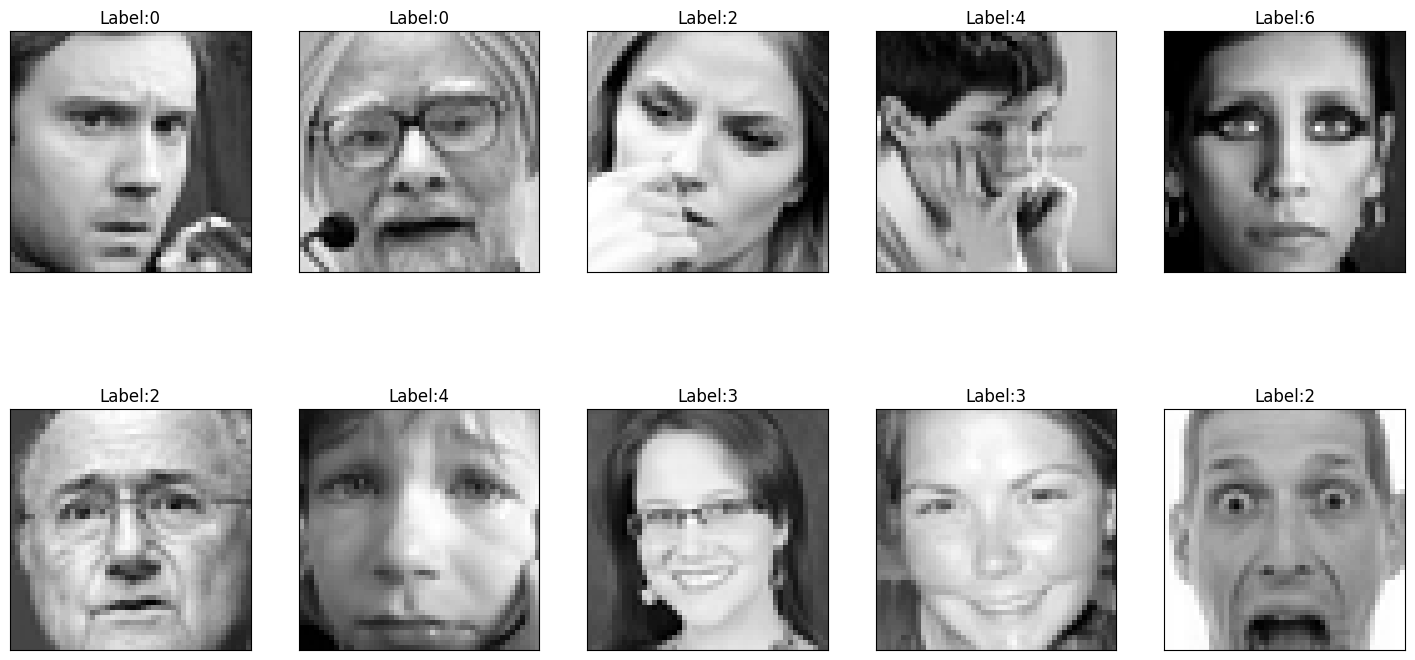

In [6]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#chuẩn hóa ảnh và trả về ảnh đã được chuẩn hóa sau khi giảm chiều
def pca_scale(images: np.ndarray):
    result = np.zeros(shape=(len(images), 48, 48))
    for i in range(len(images)):
        scaler = MinMaxScaler()
        im_scaled = scaler.fit_transform(images[i])
        pca = PCA(n_components=2)
        im_pca = pca.fit_transform(im_scaled)
        im_pca_inverse = pca.inverse_transform(im_pca)
        im_pca_inverse_scale = scaler.inverse_transform(im_pca_inverse)
        result[i] = im_pca_inverse_scale
    return result

images_pca = pca_scale(images)

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543:

In [27]:
images_pca

array([[[ 69.92227962,  69.47159956,  71.33778399, ...,  71.14179395,
          70.10387667,  65.2483088 ],
        [ 52.82102463,  50.60910656,  55.80038396, ...,  65.73699948,
          65.00483841,  57.84521128],
        [ 45.32619627,  43.96838786,  51.78460612, ...,  62.29432873,
          61.49049457,  53.47582562],
        ...,
        [ 54.46648954,  41.03399338,  37.72576861, ...,  73.78007391,
          74.4592373 ,  66.43735762],
        [ 53.01114232,  36.2590694 ,  30.9575554 , ...,  75.41367232,
          76.51979537,  68.00018867],
        [ 59.7630483 ,  45.02639604,  39.36004239, ...,  76.67570742,
          77.49413687,  70.00984138]],

       [[151.19293578, 137.03732604, 133.56121237, ..., 125.89470203,
         108.36604598, 117.44017796],
        [151.20645297, 137.13225287, 133.3070466 , ..., 126.07237828,
         108.85261862, 117.34484219],
        [152.06583691, 136.37120274, 133.636363  , ..., 128.41238264,
         110.84608787, 121.48090416],
        ...,


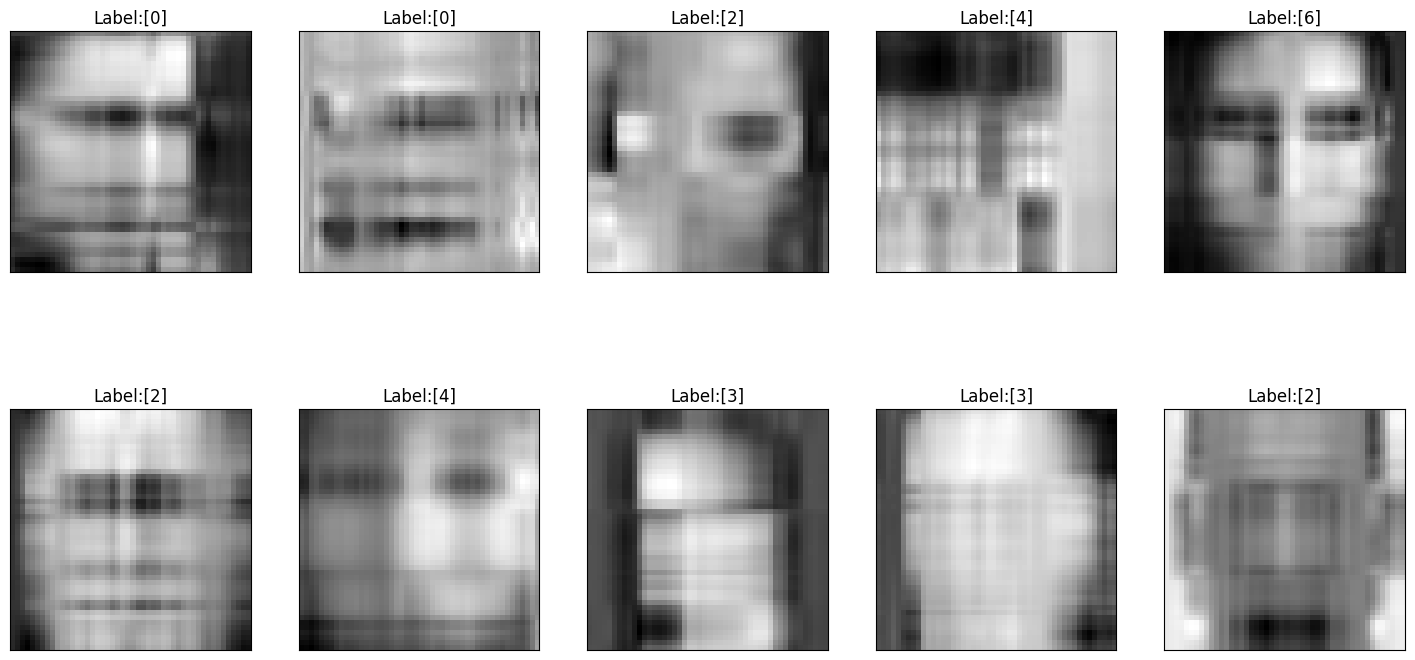

In [28]:
## visualizing here
images_pca.shape
show_img(images_pca, labels)

C:\Users\_DELL_\AppData\Local\Temp\ipykernel_20712\180957503.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(images_pca[:,1], images_pca[:,2], cmap="rainbow")


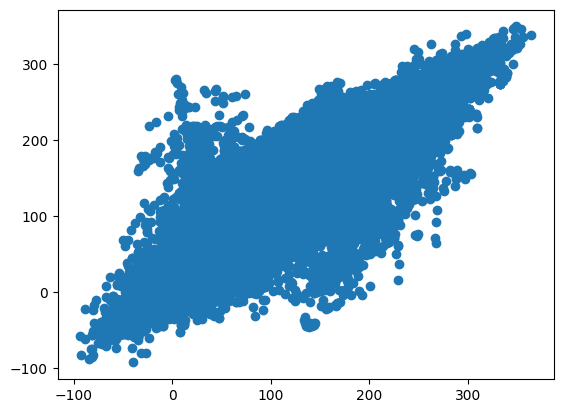

In [29]:
plt.scatter(images_pca[:,1], images_pca[:,2], cmap="rainbow")

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [65]:
## determine the optimal number of PCs here
scaler = MinMaxScaler()
optimal = [0] * 25
pca = PCA()
threshold = 0.95
for i in range(len(images)):
  im = scaler.fit_transform(images[i])
  im = pca.fit(im)
  explained_variance = pca.explained_variance_
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
  optimal_num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
  optimal[optimal_num_components] += 1

for i in range(len(optimal)):
  print(f'Số lượng thành phần chính tối ưu là {i} : {optimal[i]}')

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\_DELL_\AppData\Local\Temp\ipykernel_20712\200585823.py:10: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\_DELL_\AppData\Local\Temp\ipykernel_20712\200585823.py:10: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: inv

Số lượng thành phần chính tối ưu là 0 : 0
Số lượng thành phần chính tối ưu là 1 : 13
Số lượng thành phần chính tối ưu là 2 : 5
Số lượng thành phần chính tối ưu là 3 : 11
Số lượng thành phần chính tối ưu là 4 : 48
Số lượng thành phần chính tối ưu là 5 : 173
Số lượng thành phần chính tối ưu là 6 : 685
Số lượng thành phần chính tối ưu là 7 : 1813
Số lượng thành phần chính tối ưu là 8 : 3779
Số lượng thành phần chính tối ưu là 9 : 6128
Số lượng thành phần chính tối ưu là 10 : 7352
Số lượng thành phần chính tối ưu là 11 : 6426
Số lượng thành phần chính tối ưu là 12 : 4639
Số lượng thành phần chính tối ưu là 13 : 2646
Số lượng thành phần chính tối ưu là 14 : 1289
Số lượng thành phần chính tối ưu là 15 : 543
Số lượng thành phần chính tối ưu là 16 : 181
Số lượng thành phần chính tối ưu là 17 : 74
Số lượng thành phần chính tối ưu là 18 : 39
Số lượng thành phần chính tối ưu là 19 : 21
Số lượng thành phần chính tối ưu là 20 : 8
Số lượng thành phần chính tối ưu là 21 : 6
Số lượng thành phần chính 

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### Prepare Data

In [69]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

In [70]:
# data source theo cách xử lý cho toàn tập
scaler = MinMaxScaler()
pca = PCA(n_components = 12)

trainX_flat = scaler.fit_transform(trainX.reshape(len(trainX), 48*48))
testX_flat = scaler.transform(testX.reshape(len(testX), 48*48))

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

In [71]:
def pca_scale(images: np.ndarray, images2: np.ndarray):
    scaler = MinMaxScaler()
    result = np.zeros(shape=(len(images), 48, 48))
    result2 = np.zeros(shape=(len(images), 48, 48))
    for i in range(len(images)):
        im_scaled = scaler.fit_transform(images[i])
        result[i] = im_scaled
        
    for i in range(len(images2)):
        im_scaled = scaler.fit_transform(images[i])
        result2[i] = im_scaled

    return result, result2

In [51]:
# data source theo cách xử lý từng ảnh
trainX2_flat, testX2_flat = pca_scale1(trainX, testX)
trainX2_processed, testX2_processed = pca_scale(trainX, testX)

trainX2_flat = trainX2_flat.reshape(len(trainX2_flat), 48*48)
testX2_flat = testX2_flat.reshape(len(testX2_flat), 48*48)
trainX2_processed = trainX2_processed.reshape(len(trainX2_processed), 48*48)
testX2_processed = testX2_processed.reshape(len(testX2_processed), 48*48)

TypeError: pca_scale() takes 1 positional argument but 2 were given

### TRAINING MODEL

## MLP

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Định nghĩa MLPClassifier
mlp = MLPClassifier()

In [17]:
# Huấn luyện mô hình
mlp.fit(trainX_flat, trainY)


# Dự đoán trên tập kiểm tra
y_pred = mlp.predict(testX_flat)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

In [18]:
# Huấn luyện mô hình
mlp.fit(trainX_processed, trainY)


# Dự đoán trên tập kiểm tra
y_pred = mlp.predict(testX_processed)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

### Random Forest Classifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
model.fit(trainX_flat, trainY)

y_pred = model.predict(testX_flat)
print(classification_report(testY, y_pred))
# model.fit(trainX_pca_shape, trainY)

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.58      0.19      0.28       985
           1       1.00      0.25      0.39       102
           2       0.56      0.26      0.35      1043
           3       0.43      0.82      0.56      1765
           4       0.38      0.37      0.37      1210
           5       0.67      0.56      0.61       795
           6       0.44      0.39      0.41      1278

    accuracy                           0.46      7178
   macro avg       0.58      0.40      0.43      7178
weighted avg       0.50      0.46      0.44      7178



In [48]:
model.fit(trainX_processed, trainY)
y_pred_pca = model.predict(testX_processed)
print(classification_report(testY, y_pred_pca))

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.51      0.17      0.25       985
           1       0.89      0.17      0.28       102
           2       0.52      0.22      0.31      1043
           3       0.33      0.73      0.45      1765
           4       0.33      0.29      0.31      1210
           5       0.57      0.41      0.48       795
           6       0.40      0.27      0.32      1278

    accuracy                           0.38      7178
   macro avg       0.51      0.32      0.34      7178
weighted avg       0.43      0.38      0.36      7178



## SVM

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()

# Huấn luyện mô hình
svm.fit(trainX_flat, trainY)

# Dự đoán trên tập kiểm tra
y_pred = svm.predict(testX_flat)

# Đánh giá mô hình

print("SVM on original data")
print(classification_report(testY, y_pred))

# Huấn luyện mô hình
svm.fit(trainX_processed, trainY)

# Dự đoán trên tập kiểm tra
y_pred = svm.predict(testX_processed)

# Đánh giá mô hình
print("SVM on PCA-processed data")
print(classification_report(testY, y_pred))

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: unsupported format string passed to DecisionTreeClassifier.__format__

## NAVIE BAYES

In [60]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming labels is a 1D array of shape (n_samples,)
# Reshape it to (n_samples, 1) for single-output classification
labels = labels.reshape(-1, 1)

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Wrap the classifier with MultiOutputClassifier for multi-output classification
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

# Fit the model on the original data
multi_target_nb.fit(trainX_flat, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX_flat)

# Evaluate the model
print("Classification Report for original data:")
print(classification_report(testY, y_pred))

# Fit the model on the PCA-transformed data
multi_target_nb.fit(trainX_processed, trainY)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(testX_processed)

# Evaluate the model with PCA data
print("\nClassification Report for PCA-transformed data:")
print(classification_report(testY, y_pred_pca))


Classification Report for original data:
              precision    recall  f1-score   support

           0       0.20      0.05      0.08       985
           1       0.02      0.17      0.03       102
           2       0.21      0.05      0.09      1043
           3       0.42      0.14      0.21      1765
           4       0.25      0.40      0.31      1210
           5       0.20      0.60      0.30       795
           6       0.28      0.16      0.21      1278

    accuracy                           0.21      7178
   macro avg       0.22      0.23      0.17      7178
weighted avg       0.27      0.21      0.20      7178


Classification Report for PCA-transformed data:
              precision    recall  f1-score   support

           0       0.22      0.06      0.09       985
           1       0.00      0.00      0.00       102
           2       0.16      0.03      0.05      1043
           3       0.28      0.70      0.40      1765
           4       0.30      0.23      0.2

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Decision Tree 

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(trainX_flat, trainY)

y_pred = model.predict(testX_flat)
print(classification_report(testY, y_pred))

model.fit(trainX_processed, trainY)
y_pred_pca = model.predict(testX_processed)
print(classification_report(testY, y_pred_pca))

              precision    recall  f1-score   support

           0       0.24      0.21      0.22       985
           1       0.18      0.12      0.14       102
           2       0.24      0.24      0.24      1043
           3       0.41      0.43      0.42      1765
           4       0.26      0.28      0.27      1210
           5       0.42      0.38      0.40       795
           6       0.27      0.28      0.28      1278

    accuracy                           0.31      7178
   macro avg       0.29      0.28      0.28      7178
weighted avg       0.31      0.31      0.31      7178

              precision    recall  f1-score   support

           0       0.25      0.20      0.22       985
           1       0.33      0.20      0.25       102
           2       0.27      0.22      0.24      1043
           3       0.31      0.48      0.38      1765
           4       0.25      0.22      0.23      1210
           5       0.40      0.29      0.34       795
           6       0.27 

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [72]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming labels is a 1D array of shape (n_samples,)
# Reshape it to (n_samples, 1) for single-output classification
labels = labels.reshape(-1, 1)

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Wrap the classifier with MultiOutputClassifier for multi-output classification
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

In [73]:
# Fit the model on the original data
multi_target_nb.fit(trainX_flat, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX_flat)

# Evaluate the model
print("Classification Report for original data:")
print(classification_report(testY, y_pred))

Classification Report for original data:
              precision    recall  f1-score   support

           0       0.20      0.05      0.08       985
           1       0.02      0.17      0.03       102
           2       0.21      0.05      0.09      1043
           3       0.42      0.14      0.21      1765
           4       0.25      0.40      0.31      1210
           5       0.20      0.60      0.30       795
           6       0.28      0.16      0.21      1278

    accuracy                           0.21      7178
   macro avg       0.22      0.23      0.17      7178
weighted avg       0.27      0.21      0.20      7178



In [74]:
# Fit the model on the PCA-transformed data
multi_target_nb.fit(trainX_processed, trainY)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(testX_processed)

# Evaluate the model with PCA data
print("\nClassification Report for PCA-transformed data:")
print(classification_report(testY, y_pred_pca))


Classification Report for PCA-transformed data:
              precision    recall  f1-score   support

           0       0.22      0.06      0.09       985
           1       0.00      0.00      0.00       102
           2       0.16      0.03      0.05      1043
           3       0.28      0.70      0.40      1765
           4       0.30      0.23      0.26      1210
           5       0.29      0.19      0.23       795
           6       0.31      0.20      0.24      1278

    accuracy                           0.28      7178
   macro avg       0.22      0.20      0.18      7178
weighted avg       0.26      0.28      0.23      7178



c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera